Movie title 영화 제목
Plot overview 줄거리 개요
Release date 개봉일
Popularity score 인기 점수
Average user rating 평균 사용자 평점
Total vote count 총 득표수

## “TMDB에서 평점(vote_average)이 높은 영화는 정말로 대중적 인기(vote_count)도 높은가?”

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns # 그래프 작성
import matplotlib.pyplot as plt

In [12]:
# vote_average   # 영화 평점 (품질)
# vote_count     # 투표 수 (인기/대중성)

In [8]:
# 데이터 불러오기
df_mov = pd.read_csv('data/tmdb_top_rated_movies.csv')
df_mov.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,34.9251,8.714,29392
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,35.3344,8.685,22179
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,14.3757,8.571,13404
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,11.9510,8.566,16926
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,11.4863,8.549,9598


In [10]:
# 결측치 확인 : 데이터셋에서 값이 빠져 있거나 누락된 부분을 찾아내는 과정
df_mov[['vote_average', 'vote_count']].isnull().sum()

vote_average    0
vote_count      0
dtype: int64

In [15]:
# 븐석용 데이터만 추리기 
df_base = df_mov[['title', 'vote_average', 'vote_count']].dropna()
df_base

,title,vote_average,vote_count
0,The Shawshank Redemption,8.714,29392
1,The Godfather,8.685,22179
2,The Godfather Part II,8.571,13404
3,Schindler's List,8.566,16926
4,12 Angry Men,8.549,9598
...,...,...,...
8555,Emmanuelle,5.954,797
8556,Role Play,5.953,602
8557,Grand Piano,5.953,529
8558,EDtv,5.953,669


## 1) 산점도 확인 

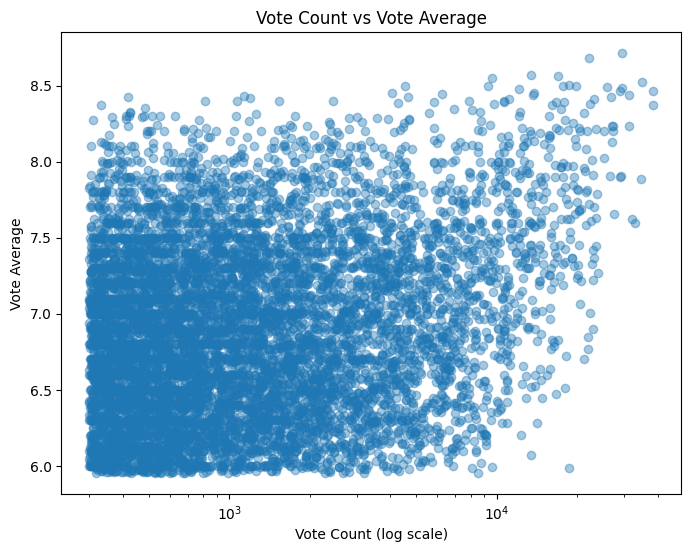

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df_base['vote_count'], df_base['vote_average'], alpha=0.4)
plt.xscale('log')  # 투표 수는 로그 스케일이 핵심
plt.xlabel('Vote Count (log scale)')
plt.ylabel('Vote Average')
plt.title('Vote Count vs Vote Average')
plt.show()

In [21]:
# 투표 수 로그 변환
df_base['log_vote_count'] = np.log1p(df_base['vote_count'])

In [22]:
# 평균값 계산 (사분면 기준선)
rating_mean = df_base['vote_average'].mean()
popularity_mean = df_base['log_vote_count'].mean()

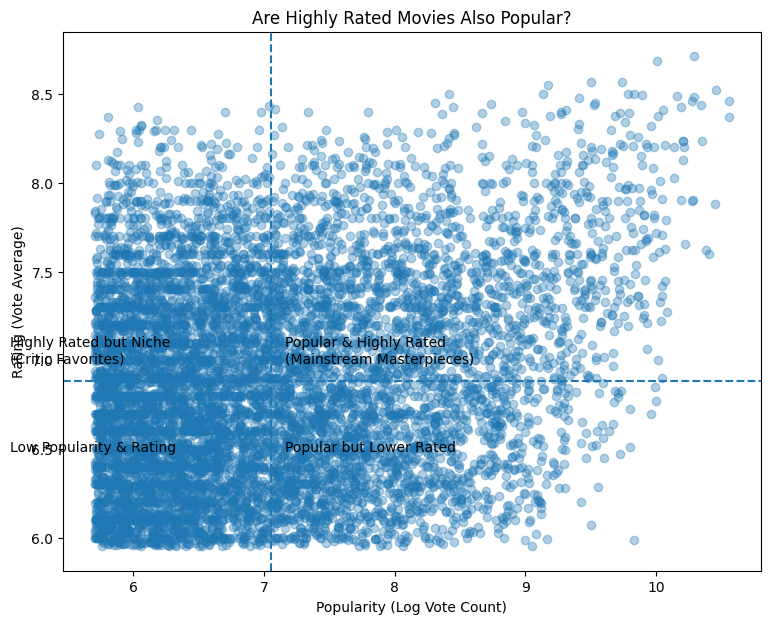

In [23]:
# 그래프 그리기
plt.figure(figsize=(9, 7))
plt.scatter(
    df_base['log_vote_count'],
    df_base['vote_average'],
    alpha=0.35
)

# 평균 기준선
plt.axhline(rating_mean, linestyle='--')
plt.axvline(popularity_mean, linestyle='--')

# 축 라벨 및 제목
plt.xlabel("Popularity (Log Vote Count)")
plt.ylabel("Rating (Vote Average)")
plt.title("Are Highly Rated Movies Also Popular?")

# 사분면 설명 텍스트
plt.text(
    popularity_mean + 0.1, rating_mean + 0.1,
    "Popular & Highly Rated\n(Mainstream Masterpieces)"
)
plt.text(
    popularity_mean + 0.1, rating_mean - 0.4,
    "Popular but Lower Rated"
)
plt.text(
    popularity_mean - 2.0, rating_mean + 0.1,
    "Highly Rated but Niche\n(Critic Favorites)"
)
plt.text(
    popularity_mean - 2.0, rating_mean - 0.4,
    "Low Popularity & Rating"
)

plt.show()

## “영화의 평점과 대중적 인기는 동일한 개념이 아니며, 높은 평점을 받은 영화 중 상당수는 제한된 관객에게만 소비된다.”

1) ① 평점이 높아도 인기 없는 영화가 많다

왼쪽 위 사분면(Highly Rated but Niche) =>  많은 점이 밀집

→ 소수의 평가로 높은 평점을 받은 영화 다수 존재

[평점 ≠ 대중성]

2) 진짜 ‘대중적 명작’은 전체 중 일부에 불과하다

오른쪽 위 사분면(Popular & Highly Rated)은 상대적으로 밀도가 낮음

→ 많이 보고 + 많이 인정받은 영화는 소수

[명작은 희소하다]

## 로그 변환의 효과

작은 값 영역 → 펼쳐서 보여줌

큰 값 영역 → 압축해서 보여줌

결과적으로:

니치 영화와 대중 영화가 같은 화면에서 비교 가능

전체 분포 패턴이 드러남

📊 해석이 가능한 산점도가 됨

## 그 외 test

## 수치적으로 관계 검증하기 (상관계수)

In [17]:
df_base[['vote_average', 'vote_count']].corr()

,vote_average,vote_count
vote_average,1.000000,0.272693
vote_count,0.272693,1.000000


약한 음/양의 상관 -> '직관과 다른다' 

## 문제점 
- 투표 수가 10개인 영화와 투표 수가 10만 개인 영화의 평점을 같은 선상에서 비교해도 되는가?

해결 : 투표 수 기준 필터링

In [19]:
threshold = df_base['vote_count'].quantile(0.75)

df_filtered = df_base[df_base['vote_count'] >= threshold]

In [20]:
df_filtered

,title,vote_average,vote_count,log_vote_count
0,The Shawshank Redemption,8.714,29392,10.288512
1,The Godfather,8.685,22179,10.006946
2,The Godfather Part II,8.571,13404,9.503383
3,Schindler's List,8.566,16926,9.736665
4,12 Angry Men,8.549,9598,9.169414
...,...,...,...,...
8546,Killers,5.956,2271,7.728416
8547,Ghosts of Girlfriends Past,5.958,2381,7.775696
8548,The Marvels,5.955,3186,8.066835
8551,Transformers: Age of Extinction,5.955,8544,9.053102


“TMDB 데이터 분석 결과,
영화의 평점이 높다고 해서 반드시 대중적 인기가 높은 것은 아니었다.
특히 투표 수가 적은 영화의 경우, 평점 신뢰도가 낮아
단순 평균 평점만으로 명작을 판단하는 데 한계가 있음을 확인.”